In [20]:
import roboverse
import numpy as np
import glob
import matplotlib.pyplot as plt


In [3]:
from roboverse.assets.shapenet_object_lists import GRASP_TRAIN_OBJECTS, GRASP_TEST_OBJECTS

In [16]:
def get_dataset(obj, successful=False):
    traj_type = 'successful' if successful else 'all'
    if obj in GRASP_TRAIN_OBJECTS:
        trajs_folder = f'grasp_big_train_{traj_type}'
    elif obj in GRASP_TEST_OBJECTS:
        trajs_folder = 'grasp_big_test_{traj_type}'
    else:
        raise Exception('Invalid object')
    return np.load(glob.glob(f'/nfs/kun2/users/chet/robo_exp/trajs/{trajs_folder}/{obj}*')[0], allow_pickle=True)

def scripted_success_rate(obj):
    dataset = get_dataset(obj)
    return np.mean([traj['rewards'][-1] > 0 for traj in dataset])

In [11]:
for train_obj in GRASP_TRAIN_OBJECTS:
    print(train_obj, scripted_success_rate(train_obj))

conic_cup 0.179
fountain_vase 0.538
circular_table 0.409
hex_deep_bowl 0.011
smushed_dumbbell 0.152
square_prism_bin 0.095
narrow_tray 0.293
colunnade_top 0.311
stalagcite_chunk 0.242
bongo_drum_bowl 0.018
pacifier_vase 0.204
beehive_funnel 0.143
crooked_lid_trash_can 0.249
toilet_bowl 0.267
pepsi_bottle 0.287
tongue_chair 0.292
modern_canoe 0.276
pear_ringed_vase 0.191
short_handle_cup 0.05
bullet_vase 0.217
glass_half_gallon 0.193
flat_bottom_sack_vase 0.045
trapezoidal_bin 0.19
vintage_canoe 0.258
bathtub 0.227
flowery_half_donut 0.117
t_cup 0.154
cookie_circular_lidless_tin 0.103
box_sofa 0.184
two_layered_lampshade 0.038
conic_bin 0.03
jar 0.034
bunsen_burner 0.338
long_vase 0.392
ringed_cup_oversized_base 0.408
aero_cylinder 0.095


In [17]:
conic_cup_trajs = get_dataset('conic_cup', successful=True)

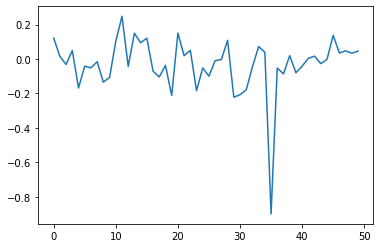

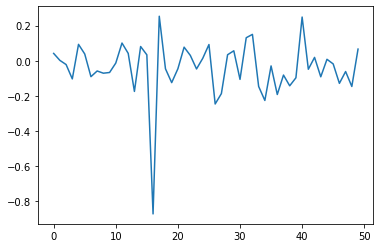

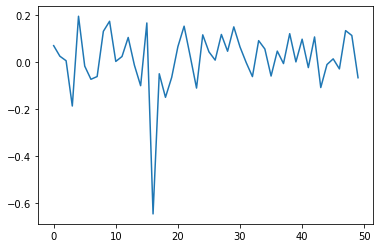

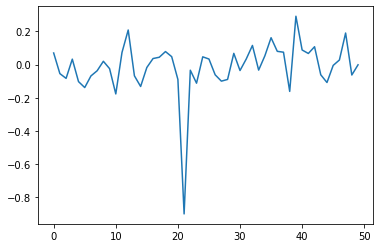

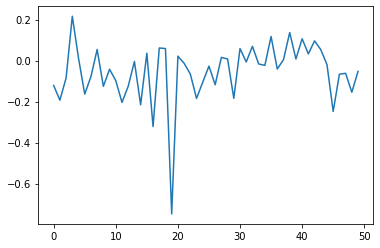

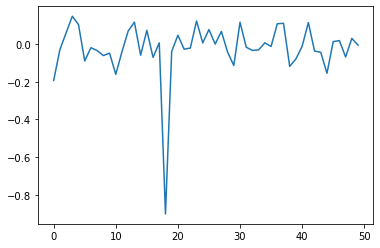

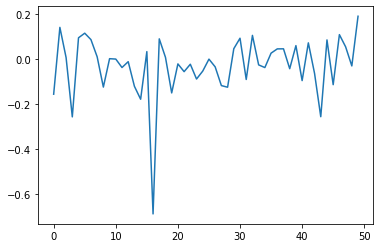

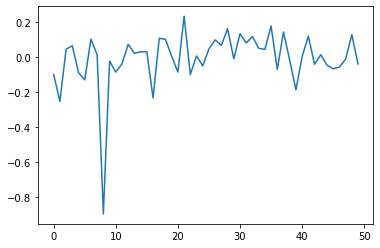

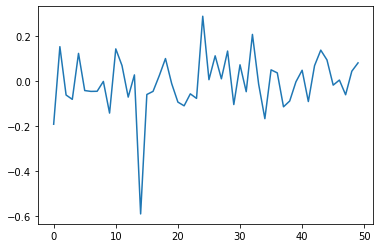

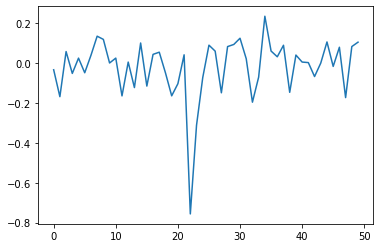

In [21]:
for traj in conic_cup_trajs[:10]:
    plt.plot([a[6] for a in traj['actions']])
    plt.show()